<a href="https://colab.research.google.com/github/208B1A0428/RESUME-PROJECTS/blob/master/Cat_vs_Dog_image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing DOGS VS CATS Dataset from kaggle**

In [6]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'dog image.jpeg'    kaggle.json		   test1.zip
 dogs-vs-cats.zip   sample_data		   train
'image resized'     sampleSubmission.csv   train.zip


In [7]:
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [8]:
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [9]:
import os
#counting the no.of files in the train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("Number of Images",file_count)

Number of Images 25000


**print** **name** **of** **images**

In [10]:
file_names=os.listdir('/content/train')
print(file_names[:5])

['cat.6302.jpg', 'cat.11431.jpg', 'dog.12492.jpg', 'cat.9200.jpg', 'cat.1908.jpg']


**Importing the libraries**

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

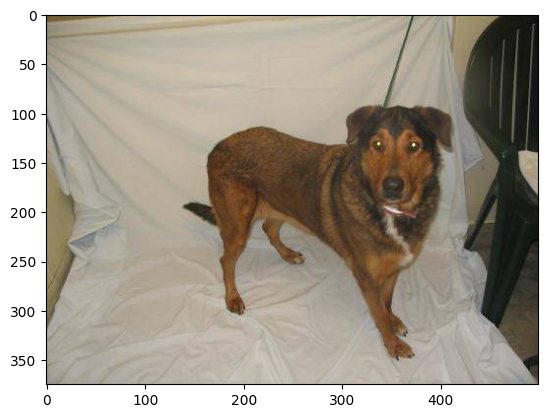

In [12]:
img=mpimg.imread("/content/train/dog.1315.jpg")
imgplt=plt.imshow(img)
plt.show()

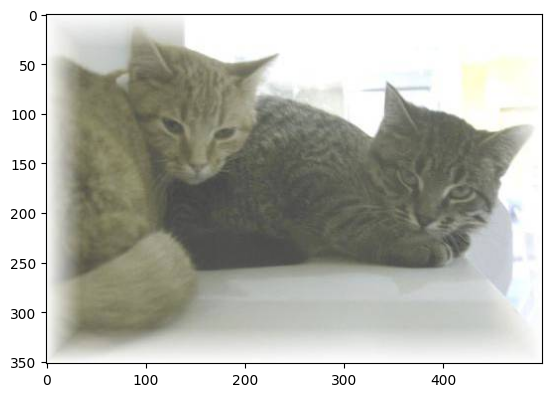

In [13]:
img=mpimg.imread("/content/train/cat.6150.jpg")
imgplt=plt.imshow(img)
plt.show()

In [14]:
file_names=os.listdir('/content/train')

for i in range(5):
  names=file_names[i]
  print(names[0:3])

cat
cat
dog
cat
cat


In [15]:
dog_count,cat_count=0,0
for file_img in file_names:
    name=file_img[0:3]
    if(name=='dog'):
      dog_count+=1
    else:
      cat_count+=1
print("No.of dog images:",dog_count)
print("No.of cat images:",cat_count)

No.of dog images: 12500
No.of cat images: 12500


**Resizing the all images**

In [16]:
import os

directory_path = '/content/image resized'
os.makedirs(directory_path, exist_ok=True)


In [17]:
original_folder='/content/train/'
filename=os.listdir(original_folder)
print(filename[:5])

['cat.6302.jpg', 'cat.11431.jpg', 'dog.12492.jpg', 'cat.9200.jpg', 'cat.1908.jpg']


In [18]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range (2000):

  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")

  newImgPath=resized_folder+filename
  img.save(newImgPath)

**Display resized dog image and cat image**

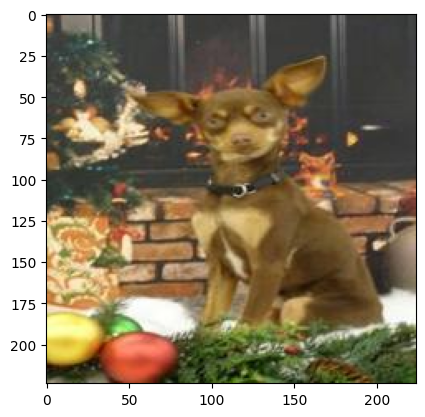

In [21]:
# display resized dog image
img=mpimg.imread('/content/image resized/dog.12492.jpg')
imgplt=plt.imshow(img)
plt.show()

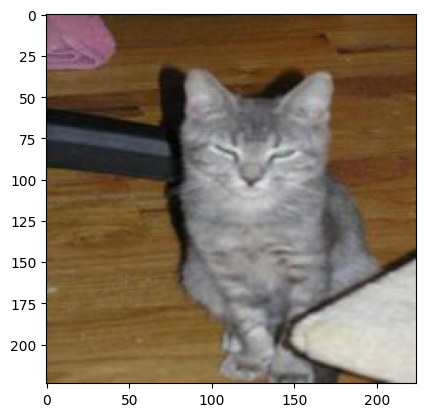

In [23]:
# Display resized cat Image
img=mpimg.imread('/content/image resized/cat.11431.jpg')
imgplt=plt.imshow(img)
plt.show()

In [24]:
filenames= os.listdir('/content/image resized')

labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if(label=='dog'):
    labels.append(1)
  else:
    labels.append(0)

In [25]:
print(filenames[0:5])
print(len(filenames))

['cat.6302.jpg', 'cat.11431.jpg', 'dog.12492.jpg', 'cat.9200.jpg', 'cat.1908.jpg']
2000


In [26]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [27]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1022  978]


**Converting all the resized images to numpy arrays**

In [28]:
import cv2
import glob


In [29]:
image_directory='/content/image resized/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)

[[[[ 28  55  89]
   [ 31  58  92]
   [ 31  58  92]
   ...
   [ 12  66 121]
   [ 12  66 121]
   [ 12  66 121]]

  [[ 18  43  75]
   [ 21  46  78]
   [ 23  48  80]
   ...
   [ 12  66 121]
   [ 12  66 121]
   [ 12  66 121]]

  [[  5  27  55]
   [  5  27  55]
   [  2  26  56]
   ...
   [ 13  67 122]
   [ 13  67 122]
   [ 13  67 122]]

  ...

  [[ 43  27  61]
   [ 41  25  59]
   [ 41  23  62]
   ...
   [ 60  41 134]
   [ 57  38 131]
   [ 54  35 128]]

  [[ 42  27  59]
   [ 42  26  60]
   [ 42  24  63]
   ...
   [ 55  36 129]
   [ 51  31 126]
   [ 53  33 128]]

  [[ 44  29  61]
   [ 45  29  63]
   [ 45  28  65]
   ...
   [ 58  39 132]
   [ 57  37 132]
   [ 65  45 140]]]


 [[[121  93 146]
   [116  88 141]
   [113  84 139]
   ...
   [ 20  56  96]
   [ 19  55  95]
   [ 19  55  95]]

  [[123  95 148]
   [121  93 146]
   [122  93 148]
   ...
   [ 21  57  97]
   [ 20  56  96]
   [ 19  55  95]]

  [[115  88 138]
   [115  88 138]
   [120  92 145]
   ...
   [ 20  56  96]
   [ 20  56  96]
   [ 19  55

In [31]:
type(dog_cat_images)

numpy.ndarray

In [32]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [33]:
x=dog_cat_images
y=np.asarray(labels)

**Train Test Split**

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [36]:
#scaling process
x_train=x_train/255
x_test=x_test/255

In [37]:
print(x_train)

[[[[0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   ...
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]]

  [[0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   ...
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]]

  [[0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   [0.43137255 0.14117647 0.14117647]
   ...
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]
   [0.53333333 0.16470588 0.16862745]]

  ...

  [[0.39215686 0.40784314 0.00392157]
   [0.39215686 0.40784314 0.00392157]
   [0.39215686 0.40784314 0.00392157]
   ...
   [0.41176471 0.49411765 0.13333333]
   [0.41568627 0.49803922 0.13333333]
   [0.41568627 0.49803922 0.13333333]]

  [[0.39607843 0.41176471 0.01568627]
   [0.3

**Buliding the Neural Network**

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pre_trained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [40]:
no_of_classes=2
model=tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.Dense(no_of_classes),


])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [42]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.1432 - accuracy: 0.9531
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0482 - accuracy: 0.9837
Epoch 3/5
50/50 [==============================] - 65s 1s/step - loss: 0.0362 - accuracy: 0.9875
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0276 - accuracy: 0.9931
Epoch 5/5
50/50 [==============================] - 64s 1s/step - loss: 0.0219 - accuracy: 0.9975


In [43]:
score_loss,accuracy=model.evaluate(x_test,y_test)

13/13 [==============================] - 25s 2s/step - loss: 0.0517 - accuracy: 0.9775


In [44]:
print('loss:',score_loss)
print('accuracy:',accuracy)

loss: 0.05173318833112717
accuracy: 0.9775000214576721


Path of the image to be predict:/content/dog image.jpeg


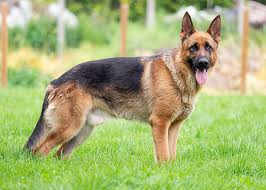

1/1 [==============================] - 1s 602ms/step
The image represents as dog


In [45]:
input_image_path=input("Path of the image to be predict:")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
if(input_pred_label==0):
  print("The image represents a Cat")
else:
  print("The image represents as dog")